### **Implementation with VGG19**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

**Seeding for reproducibility**

In [ ]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [ ]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

**Data Curation**

Upload the kaggle.json file

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails = json.load(open("kaggle (1).json"))

In [ ]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [ ]:
!kaggle datasets download -d musicofoma/ragirooga

Dataset URL: https://www.kaggle.com/datasets/musicofoma/ragirooga
License(s): unknown
 89% 49.0M/55.0M [00:00<00:00, 110MB/s] 
100% 55.0M/55.0M [00:00<00:00, 102MB/s]


In [ ]:
!ls

'kaggle (1).json'   ragirooga.zip   sample_data


In [ ]:
# Unzip the downloaded dataset
with ZipFile("ragirooga.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
print(os.listdir("dbragi"))


print(len(os.listdir("dbragi/downy")))
print(os.listdir("dbragi/downy")[:5])

print(len(os.listdir("dbragi/healthy")))
print(os.listdir("dbragi/healthy")[:5])

print(len(os.listdir("dbragi/mottle")))
print(os.listdir("dbragi/mottle")[:5])

print(len(os.listdir("dbragi/seedling")))
print(os.listdir("dbragi/seedling")[:5])

print(len(os.listdir("dbragi/smut")))
print(os.listdir("dbragi/smut")[:5])

print(len(os.listdir("dbragi/wilt")))
print(os.listdir("dbragi/wilt")[:5])

['mottle', 'healthy', 'downy', 'smut', 'seedling', 'wilt']
255
['downymildew (176).jpg', 'downymildew (190).jpg', 'downymildew (102).jpg', 'downymildew (199).jpg', 'downymildew (11).jpeg']
255
['healthy (184).jpg', 'healthy (76).jpg', 'healthy (97).jpg', 'healthy (177).jpg', 'healthy (195).jpg']
255
['mottle_streak (253).jpg', 'mottle_streak (123).jpg', 'mottle_streak (98).jpg', 'mottle_streak (188).jpg', 'mottle_streak (50).jpg']
255
['seedling (85).jpg', 'seedling (29).jpg', 'seedling (160).jpg', 'seedling (22).jpg', 'seedling (175).jpg']
255
['smut (74).jpg', 'smut (81).jpg', 'smut (164).jpg', 'smut (159).jpg', 'smut (242).jpg']
255
['wilt (33).jpg', 'wilt (158).jpg', 'wilt (169).jpg', 'wilt (223).jpg', 'wilt (244).jpg']


**Number of Classes = 6**

In [ ]:
print(len(os.listdir("dbragi/healthy")))
print(os.listdir("dbragi/healthy")[:5])

255
['healthy (184).jpg', 'healthy (76).jpg', 'healthy (97).jpg', 'healthy (177).jpg', 'healthy (195).jpg']


**Data Preprocessing**

In [ ]:
# Dataset Path
base_dir = 'dbragi'

(159, 159, 3)


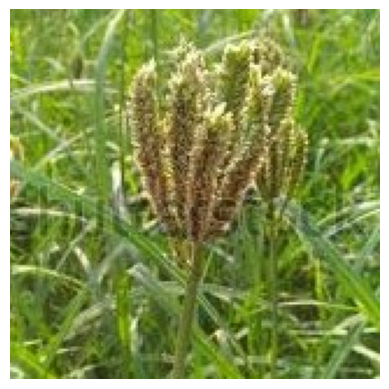

In [ ]:
image_path = '/content/dbragi/healthy/healthy (1).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [ ]:
image_path = '/content/dbragi/healthy/healthy (10).jpeg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [169 140  12]
  [164 135   0]
  [176 137   0]]

 [[ 92 103   7]
  [ 92 103   7]
  [ 89 103   5]
  ...
  [166 139  10]
  [165 137   2]
  [175 135   1]]

 [[ 93 105   7]
  [ 93 105   7]
  [ 90 104   6]
  ...
  [157 133   7]
  [164 137   6]
  [173 133   2]]

 ...

 [[100 119  11]
  [ 99 119   8]
  [ 97 117   4]
  ...
  [168 131   0]
  [167 128   0]
  [170 130   0]]

 [[100 116   7]
  [ 98 116   6]
  [ 96 114   2]
  ...
  [168 129   0]
  [168 128   0]
  [172 129   0]]

 [[104 113   4]
  [101 113   1]
  [100 114   1]
  ...
  [168 128   0]
  [169 126   0]
  [171 128   0]]]


In [ ]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [ ]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [ ]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 1212 images belonging to 6 classes.


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 302 images belonging to 6 classes.


**Convolutional Neural Network**

Implementation with VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG19 model without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the base model initially
base_model.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Unfreeze more layers in the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               26

**Model training**

In [ ]:
# Training the Model for VGG19
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=100,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/100
37/37 [==============================] - 34s 383ms/step - loss: 2.6847 - accuracy: 0.2161 - val_loss: 1.7123 - val_accuracy: 0.2639
Epoch 2/100
37/37 [==============================] - 9s 241ms/step - loss: 2.0795 - accuracy: 0.3331 - val_loss: 1.5266 - val_accuracy: 0.3646
Epoch 3/100
37/37 [==============================] - 7s 184ms/step - loss: 1.7470 - accuracy: 0.4127 - val_loss: 1.3825 - val_accuracy: 0.4583
Epoch 4/100
37/37 [==============================] - 8s 218ms/step - loss: 1.5114 - accuracy: 0.4975 - val_loss: 1.2520 - val_accuracy: 0.5243
Epoch 5/100
37/37 [==============================] - 8s 218ms/step - loss: 1.3068 - accuracy: 0.5763 - val_loss: 1.1042 - val_accuracy: 0.6007
Epoch 6/100
37/37 [==============================] - 8s 221ms/step - loss: 1.1215 - accuracy: 0.6068 - val_loss: 0.9987 - val_accuracy: 0.6424
Epoch 7/100
37/37 [==============================] - 7s 191ms/step - loss: 1.1233 - accuracy: 0.6068 - val_loss: 0.8954 - val_accuracy: 0.687

**Model Evaluation**

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
9/9 [==============================] - 2s 160ms/step - loss: 0.3665 - accuracy: 0.8646
Validation Accuracy: 86.46%


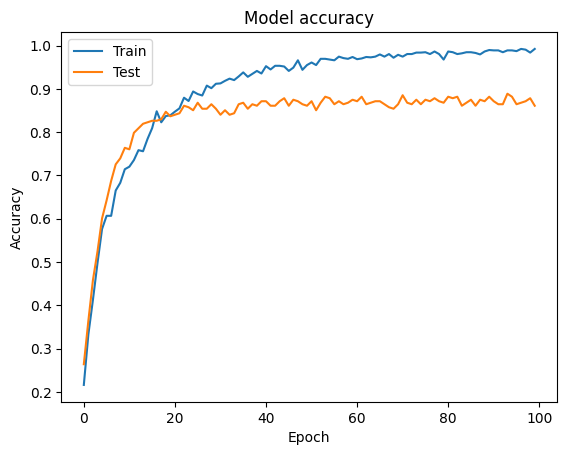

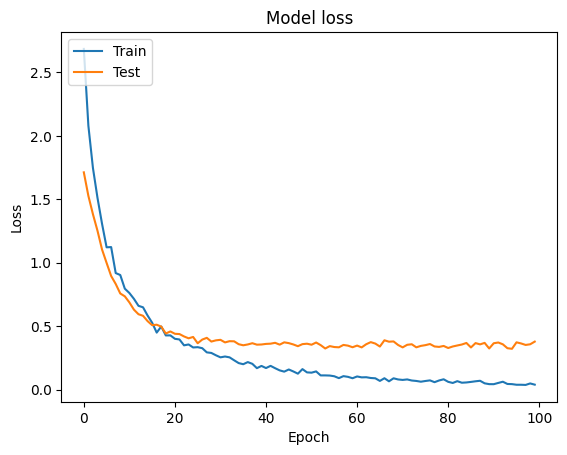

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'downy', 1: 'healthy', 2: 'mottle', 3: 'seedling', 4: 'smut', 5: 'wilt'}

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
image_path = '/content/dbragi/mottle/mottle_streak (104).jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 1s 1s/step
Predicted Class Name: mottle


**Save the model to Google drive or local**

In [ ]:
model.save('drive/MyDrive/RAW.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('ragirooga.h5')

NameError: name 'model' is not defined